In [1]:
using ValueShapes
using ArraysOfArrays
using StatsBase 
using LinearAlgebra
using Statistics
using Distributions 
using IntervalSets
using JLD2
using LaTeXStrings

In [2]:
import PyPlot
plt = PyPlot

PyPlot

In [3]:
JLD2.@load "../data/mixture-9D-nc.jld" means cov_m n_clusters

mixture_model = MixtureModel(MvNormal[MvNormal(means[i,:], Matrix(Hermitian(cov_m[i,:,:])) ) for i in 1:n_clusters]);

In [4]:
N = 10^5
samples = rand(mixture_model, N)
sample_weights = ones(N)
log_lik = randn(N);

In [5]:
SMALL_SIZE = 9
MEDIUM_SIZE = 9
BIGGER_SIZE = 10

plt.rc("font", size=SMALL_SIZE)          # controls default text sizes
plt.rc("axes", titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)    # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title
# plt.rc("text", usetex=true)

In [15]:
function corner_plots(samples::AbstractArray, sample_weights::AbstractArray, loglik::AbstractArray, dim_indices::AbstractArray, dim_names::AbstractArray;
        save_plot=false,
        FILE_NAME = "../plots/fig-g.pdf",
        N_bins = 50,
        figsize = (7,7),
        levels_quantiles = [0.4, 0.7, 0.8, 0.9, 0.99, 1,], 
        hist_color = plt.cm.Blues(0.7), 
        colors = vcat([1 1 1 1], plt.cm.Blues(range(0, stop=1, length=length(levels_quantiles)))[2:end,:])
    )
    
    N = length(dim_indices)
    bins=[] #Vector{StepRangeLen}()
    fig, ax = plt.subplots(N,N, figsize=figsize)
    fig.subplots_adjust(wspace=0.00, hspace=0.00)
    
    for idx in 1:N
        dim_idx = dim_indices[idx]
        bins_tmp = range(minimum(samples[dim_idx,:]), stop=maximum(samples[dim_idx,:]), length=N_bins)
        push!(bins, bins_tmp)
        ax[idx, idx].hist(samples[dim_idx,:], weights=sample_weights, bins=bins_tmp, color=hist_color, rasterized=true)
        ax[idx, idx].set_xlim(first(bins_tmp),last(bins_tmp))
    end
    
    for i in 2:N, j in 1:(i-1)
        dim_x = dim_indices[j]
        dim_y = dim_indices[i]
        histogram_2D = fit(Histogram, (samples[dim_x,:],samples[dim_y,:]), weights(sample_weights), (bins[j], bins[i]))
        histogram_2D = normalize(histogram_2D, mode=:probability)
        
        levels=quantile([histogram_2D.weights...], levels_quantiles)
        
        ax[i,j].contourf(midpoints(histogram_2D.edges[1]), midpoints(histogram_2D.edges[2]), histogram_2D.weights', levels=levels, colors=colors)
        ax[i,j].set_xlim(first(bins[j]),last(bins[j]))
        ax[i,j].set_ylim(first(bins[i]),last(bins[i]))
        ax[j,i].set_visible(false)
        
    end
    
    for i in 1:N, j in 1:N
        if i < N 
            ax[i,j].get_xaxis().set_visible(false)
        else
            ax[i,j].set_xticks([])
            ax[i,j].set_xlabel(dim_names[j])
        end
        
        if j == i || j>1
           ax[i,j].get_yaxis().set_visible(false) 
        else
            ax[i,j].set_yticks([])
            ax[i,j].set_ylabel(dim_names[i])
        end
    end
    
    if save_plot 
        fig.savefig(FILE_NAME, bbox_inches = "tight")
    end
        
end

corner_plots (generic function with 1 method)

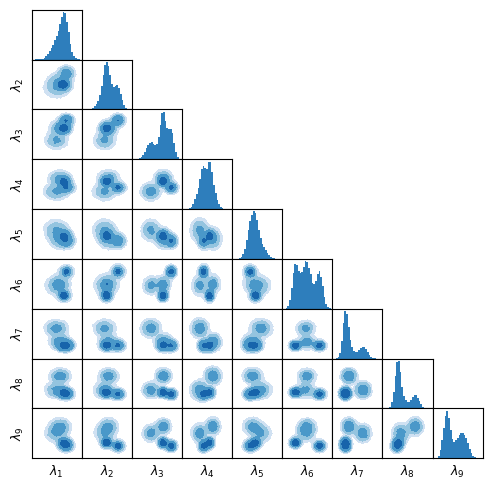

In [18]:
names = [
    L"\lambda_1", 
    L"\lambda_2", 
    L"\lambda_3", 
    L"\lambda_4", 
    L"\lambda_5",
    L"\lambda_6", 
    L"\lambda_7", 
    L"\lambda_8", 
    L"\lambda_9"
]

dims = [1,2,3,4,5,6,7,8,9]

figsize = (5.82, 5.826767123287671)

corner_plots(samples, sample_weights, log_lik, dims, names, figsize=figsize,
    N_bins=30, save_plot = false, 
    levels_quantiles = [0.4, 0.7, 0.8, 0.9, 0.98, 1,])